# The Problem
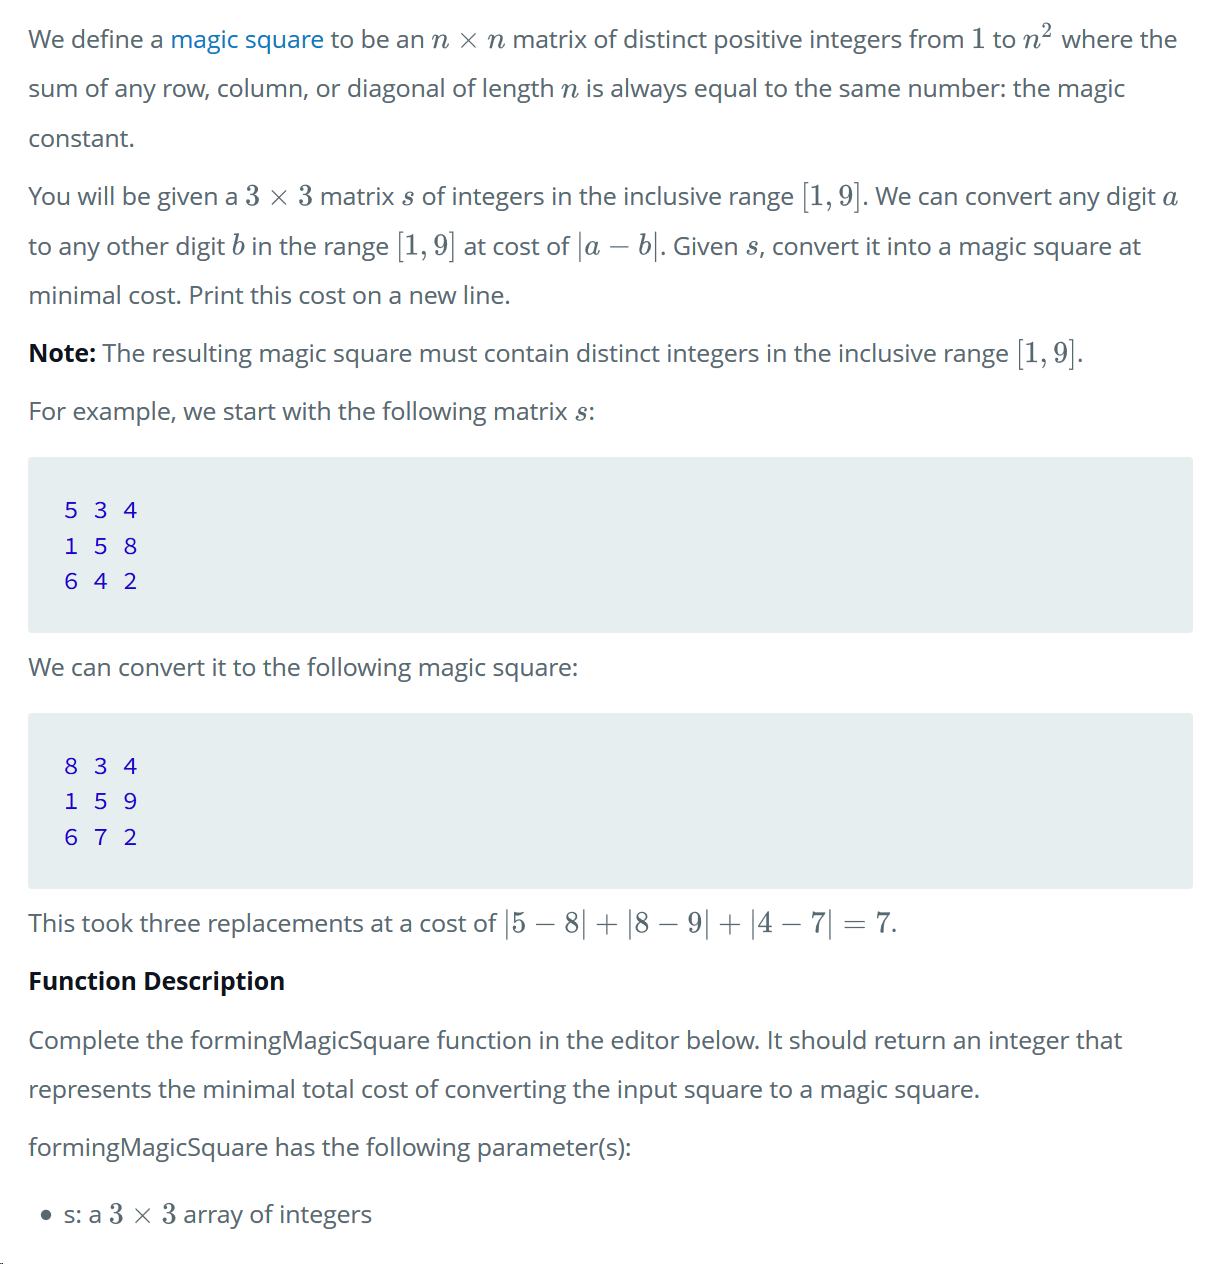

# The Solution

In [1]:
example_input = [
    [5, 3, 4],
    [1, 5, 8],
    [6, 4, 2]
]

example_output = [
    [8, 3, 4],
    [1, 5, 9],
    [6, 7, 2]
]

Since we need to know conversion costs, a helper function first.

In [2]:
def cost(a, b):
    return abs(a - b)

sum([cost(5, 8), cost(8, 9), cost(4, 7)])

7

More helper functions. We need to easily loop through a square, calculate the magic constant, and check if a square is magic.

In [3]:
def cells(square):
    n = len(square)
    for i in range(n):
        for j in range(n):
            yield i, j, square[i][j]


def magic_num(n):
    return ((n * n + 1) / 2) * n


def is_magic(square):
    n = len(square)
    magic = magic_num(n)
    seen = []
    rows = [0] * n
    cols = [0] * n
    diagonals = [0] * 2
    for i, j, cell in cells(square):
        seen.append(cell)
        rows[i] += cell
        cols[j] += cell
        if i == j:
            diagonals[0] += cell
        if i == n-j-1:
            diagonals[1] += cell
    is_distinct = len(seen) == len(set(seen))
    all_magic = len([s for s in [*rows, *cols, *diagonals] if s != magic]) == 0
    return is_distinct and all_magic

is_magic(example_input), is_magic(example_output)

(False, True)

Now we can generate all magic squares. For 3x3 this algorithm is fine, in fact a brute force 9! is pretty quick. For 4x4 this takes a while, so a more involved mathematical approach would need to be used.

In [4]:
from itertools import permutations
from math import sqrt

def generate_magic_squares(n):
    assert sqrt(n) == int(sqrt(n)), 'n must be a square'
    sublist_len = int(sqrt(n))
    magic = magic_num(sublist_len)
    nums = set(range(1, n+1))
    for first_row in permutations(nums, r=sublist_len):
        if not sum(first_row) == magic:
            continue
        exclude_first = nums - set(first_row)
        for second_row in permutations(exclude_first, r=sublist_len):
            if not sum(second_row) == magic:
                continue
            exclude_second = exclude_first - set(second_row)
            for third_row in permutations(exclude_second, r=sublist_len):
                if not sum(third_row) == magic:
                    continue
                square = [first_row, second_row, third_row]
                if is_magic(square):
                    yield square

[perm for perm in generate_magic_squares(9)]

[[(2, 7, 6), (9, 5, 1), (4, 3, 8)],
 [(2, 9, 4), (7, 5, 3), (6, 1, 8)],
 [(4, 3, 8), (9, 5, 1), (2, 7, 6)],
 [(4, 9, 2), (3, 5, 7), (8, 1, 6)],
 [(6, 1, 8), (7, 5, 3), (2, 9, 4)],
 [(6, 7, 2), (1, 5, 9), (8, 3, 4)],
 [(8, 1, 6), (3, 5, 7), (4, 9, 2)],
 [(8, 3, 4), (1, 5, 9), (6, 7, 2)]]

Now it's easy. Just calculate the total cost of changing each cell for each magic square, and return the lowest.

In [5]:
def formingMagicSquare(original):
    n = len(original) * len(original)
    return min(map(sum, [
        [cost(cell, magic[i][j]) for i, j, cell in cells(original)]
        for magic in generate_magic_squares(n)
    ]))

formingMagicSquare(example_input)

7